In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df =pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [14]:
x = df.iloc[:,[2,3]].values
y = df.iloc[:,4].values


In [15]:
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

C:\Users\FAKUNLE\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [16]:
#feature scaling (becos we want accurate prediction)
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test =sc_x.transform(x_test)

C:\Users\FAKUNLE\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [19]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [21]:
#predicting our test set result
y_pred = classifier.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [22]:
x_test

array([[-0.80480212,  0.50496393],
       [-0.01254409, -0.5677824 ],
       [-0.30964085,  0.1570462 ],
       [-0.80480212,  0.27301877],
       [-0.30964085, -0.5677824 ],
       [-1.10189888, -1.43757673],
       [-0.70576986, -1.58254245],
       [-0.21060859,  2.15757314],
       [-1.99318916, -0.04590581],
       [ 0.8787462 , -0.77073441],
       [-0.80480212, -0.59677555],
       [-1.00286662, -0.42281668],
       [-0.11157634, -0.42281668],
       [ 0.08648817,  0.21503249],
       [-1.79512465,  0.47597078],
       [-0.60673761,  1.37475825],
       [-0.11157634,  0.21503249],
       [-1.89415691,  0.44697764],
       [ 1.67100423,  1.75166912],
       [-0.30964085, -1.37959044],
       [-0.30964085, -0.65476184],
       [ 0.8787462 ,  2.15757314],
       [ 0.28455268, -0.53878926],
       [ 0.8787462 ,  1.02684052],
       [-1.49802789, -1.20563157],
       [ 1.07681071,  2.07059371],
       [-1.00286662,  0.50496393],
       [-0.90383437,  0.30201192],
       [-0.11157634,

In [26]:
#making our confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[65,  3],
       [ 8, 24]], dtype=int64)

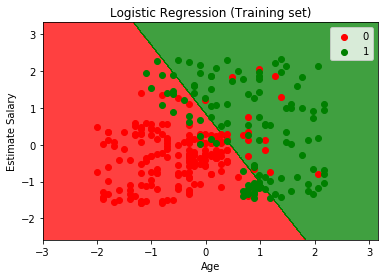

In [31]:
#visualizing our training results
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop= x_set[:, 0].max() + 1,step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop= x_set[:, 1].max() + 1,step = 0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
            alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0 ],x_set[y_set == j, 1],
               c = ListedColormap(('red','green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimate Salary')
plt.legend()
plt.show()

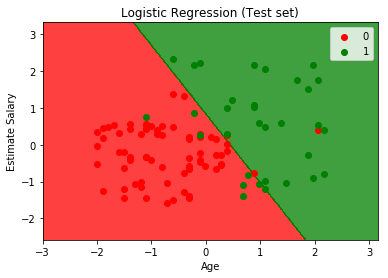

In [32]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop= x_set[:, 0].max() + 1,step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop= x_set[:, 1].max() + 1,step = 0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
            alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0 ],x_set[y_set == j, 1],
               c = ListedColormap(('red','green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimate Salary')
plt.legend()
plt.show()